In [1]:
import pandas as pd  # For data handling
import numpy as np

import matplotlib.pyplot as plt  # For visualization
import seaborn as sns

from sklearn.model_selection import train_test_split  # For machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style='whitegrid')  # For better-looking plots


In [2]:
df = pd.read_csv('laptop_prices.csv')  # Load the dataset

df.head()  # Show the first 5 rows

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [5]:
print(df.columns)


Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')


In [7]:
df.info()  # Check structure and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [9]:
df.describe()  # Statistics for numerical columns

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


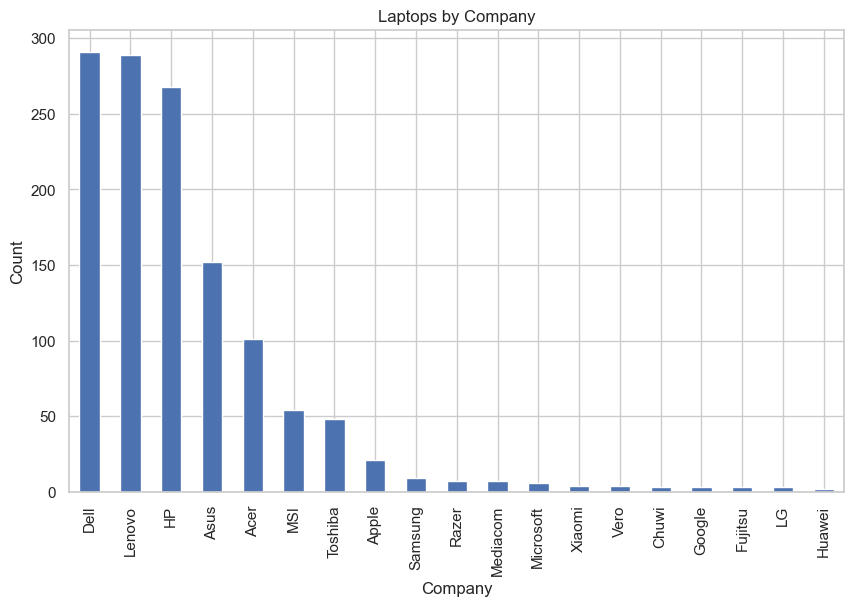

In [11]:
df['Company'].value_counts().plot(kind='bar', figsize=(10,6), title='Laptops by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

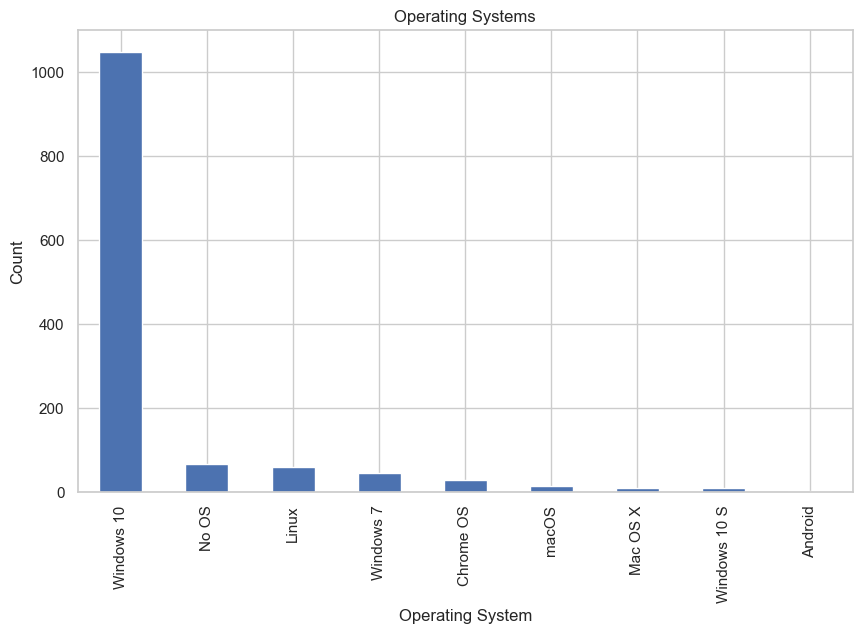

In [13]:
df['OS'].value_counts().plot(kind='bar', figsize=(10,6), title='Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()

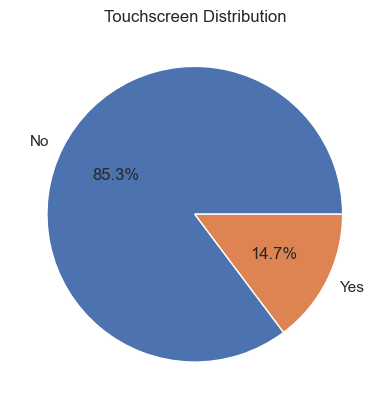

In [15]:
df['Touchscreen'].value_counts().plot(kind='pie', autopct='%.1f%%', title='Touchscreen Distribution')
plt.ylabel('')
plt.show()

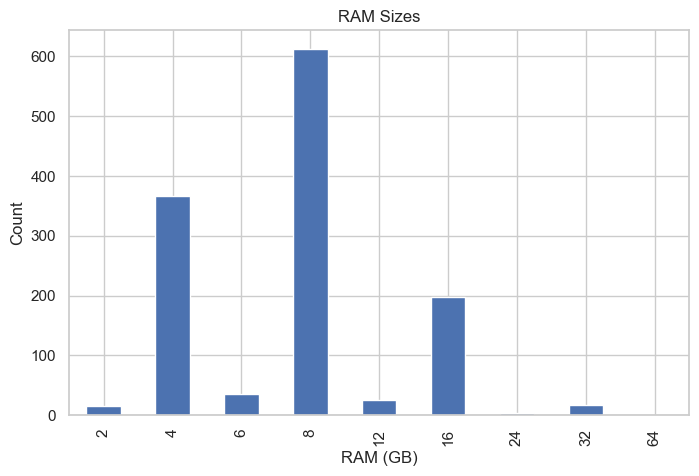

In [17]:
df['Ram'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), title='RAM Sizes')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()


In [19]:
df.dtypes  # Show all column names with their data types

Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
dtype: object

In [21]:
categorical_cols = ['Company', 'OS', 'TypeName', 'Touchscreen', 'IPSpanel',   # List of categorical columns to encode
                    'RetinaDisplay', 'CPU_company', 'PrimaryStorageType',
                    'SecondaryStorageType', 'GPU_company']                   

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # Convert categorical columns to numerical using one-hot encoding

df_encoded.shape # Show the new shape


(1275, 58)

In [23]:
X = df_encoded.drop('Price_euros', axis=1)  # Separate features and target
y = df_encoded['Price_euros']

print("Feature shape:", X.shape)  # Confirm shapes
print("Target shape:", y.shape)

Feature shape: (1275, 57)
Target shape: (1275,)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the dataset: 80% training and 20% testing

print("Training features shape:", X_train.shape)  # Confirm the shapes
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


Training features shape: (1020, 57)
Test features shape: (255, 57)
Training labels shape: (1020,)
Test labels shape: (255,)


In [27]:
print(X_train.isnull().sum().sum())  # Total NaNs in X_train
print(y_train.isnull().sum())        # NaNs in y_train


0
0


In [29]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (1020, 57)
y_train shape: (1020,)


In [31]:
print(X_train.dtypes)
print(y_train.dtypes)


Product                         object
Inches                         float64
Ram                              int64
Weight                         float64
Screen                          object
ScreenW                          int64
ScreenH                          int64
CPU_freq                       float64
CPU_model                       object
PrimaryStorage                   int64
SecondaryStorage                 int64
GPU_model                       object
Company_Apple                     bool
Company_Asus                      bool
Company_Chuwi                     bool
Company_Dell                      bool
Company_Fujitsu                   bool
Company_Google                    bool
Company_HP                        bool
Company_Huawei                    bool
Company_LG                        bool
Company_Lenovo                    bool
Company_MSI                       bool
Company_Mediacom                  bool
Company_Microsoft                 bool
Company_Razer            

In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1020, 57) (1020,)
(255, 57) (255,)


In [35]:
non_numeric_cols = X_train.select_dtypes(exclude=['int64', 'float64']).columns
print("Non-numeric columns in X_train:", non_numeric_cols.tolist())


Non-numeric columns in X_train: ['Product', 'Screen', 'CPU_model', 'GPU_model', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'OS_Chrome OS', 'OS_Linux', 'OS_Mac OS X', 'OS_No OS', 'OS_Windows 10', 'OS_Windows 10 S', 'OS_Windows 7', 'OS_macOS', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'Touchscreen_Yes', 'IPSpanel_Yes', 'RetinaDisplay_Yes', 'CPU_company_Intel', 'CPU_company_Samsung', 'PrimaryStorageType_HDD', 'PrimaryStorageType_Hybrid', 'PrimaryStorageType_SSD', 'SecondaryStorageType_Hybrid', 'SecondaryStorageType_No', 'SecondaryStorageType_SSD', 'GPU_company_ARM', 'GPU_company_Intel', 'GPU_company_Nvidia']


In [37]:
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())


Missing values in X_train: 0
Missing values in y_train: 0


In [39]:
import numpy as np

print("Any inf in X_train:", np.isinf(X_train.select_dtypes(include=[np.number])).values.any())
print("Any inf in y_train:", np.isinf(y_train.values).any())




Any inf in X_train: False
Any inf in y_train: False


In [41]:
print(X_train.dtypes.value_counts())
print(X_train.dtypes)


bool       45
int64       5
object      4
float64     3
Name: count, dtype: int64
Product                         object
Inches                         float64
Ram                              int64
Weight                         float64
Screen                          object
ScreenW                          int64
ScreenH                          int64
CPU_freq                       float64
CPU_model                       object
PrimaryStorage                   int64
SecondaryStorage                 int64
GPU_model                       object
Company_Apple                     bool
Company_Asus                      bool
Company_Chuwi                     bool
Company_Dell                      bool
Company_Fujitsu                   bool
Company_Google                    bool
Company_HP                        bool
Company_Huawei                    bool
Company_LG                        bool
Company_Lenovo                    bool
Company_MSI                       bool
Company_Mediacom     

In [43]:
for col in X_train.columns:
    if not np.issubdtype(X_train[col].dtype, np.number):
        print(f"Non-numeric column: {col}, type: {X_train[col].dtype}")


Non-numeric column: Product, type: object
Non-numeric column: Screen, type: object
Non-numeric column: CPU_model, type: object
Non-numeric column: GPU_model, type: object
Non-numeric column: Company_Apple, type: bool
Non-numeric column: Company_Asus, type: bool
Non-numeric column: Company_Chuwi, type: bool
Non-numeric column: Company_Dell, type: bool
Non-numeric column: Company_Fujitsu, type: bool
Non-numeric column: Company_Google, type: bool
Non-numeric column: Company_HP, type: bool
Non-numeric column: Company_Huawei, type: bool
Non-numeric column: Company_LG, type: bool
Non-numeric column: Company_Lenovo, type: bool
Non-numeric column: Company_MSI, type: bool
Non-numeric column: Company_Mediacom, type: bool
Non-numeric column: Company_Microsoft, type: bool
Non-numeric column: Company_Razer, type: bool
Non-numeric column: Company_Samsung, type: bool
Non-numeric column: Company_Toshiba, type: bool
Non-numeric column: Company_Vero, type: bool
Non-numeric column: Company_Xiaomi, type: 

In [45]:
X_train = X_train.drop(['Product', 'Screen', 'CPU_model', 'GPU_model'], axis=1)
X_test = X_test.drop(['Product', 'Screen', 'CPU_model', 'GPU_model'], axis=1)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 119978.33380935669
R2 Score: 0.7582735441098936


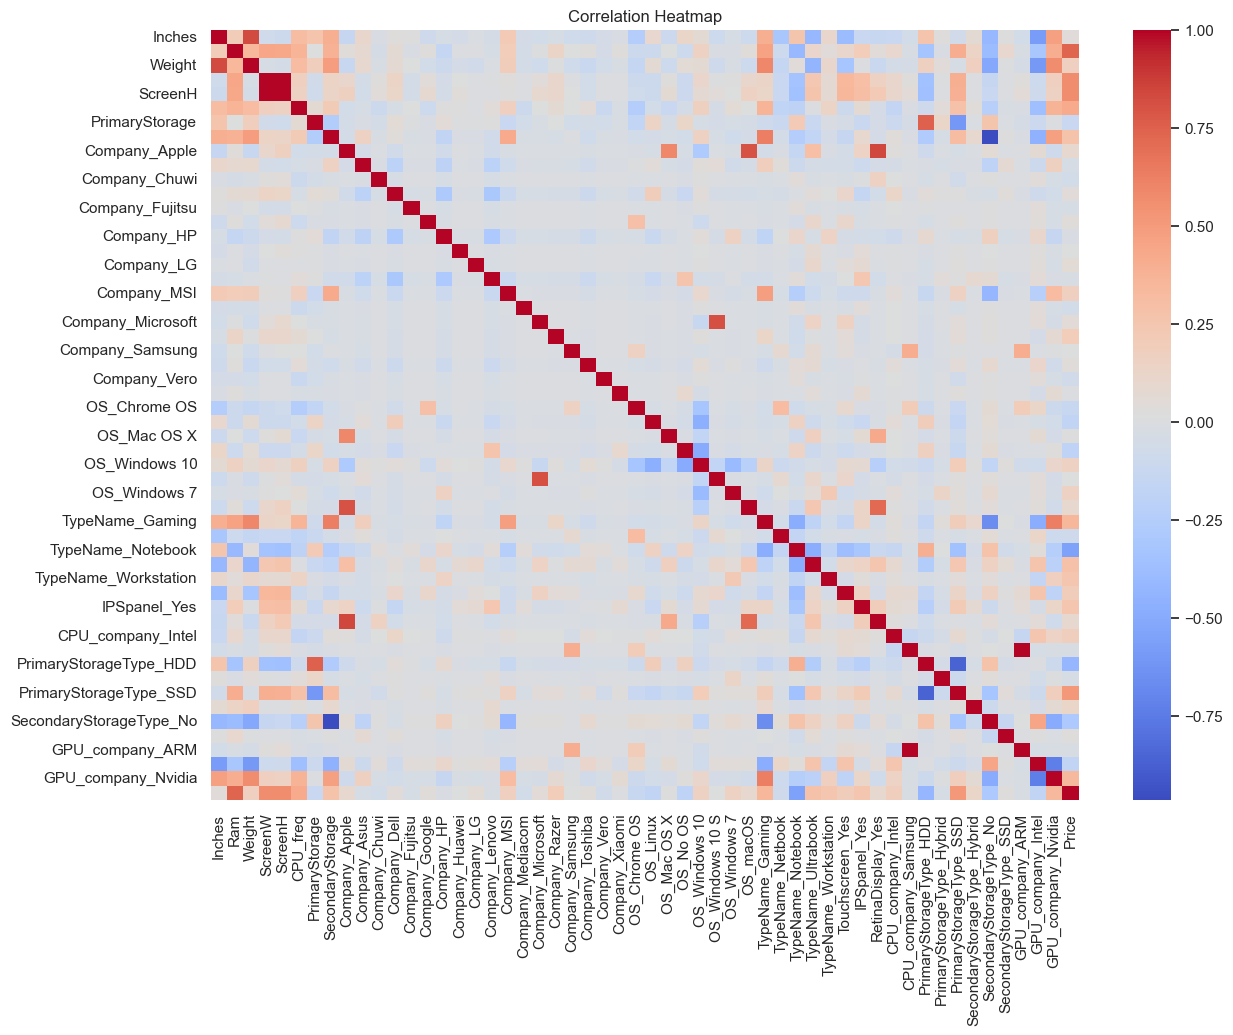

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

data_corr = X_train.copy()  # Combine X and y for correlation analysis
data_corr['Price'] = y_train

plt.figure(figsize=(14,10))
sns.heatmap(data_corr.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


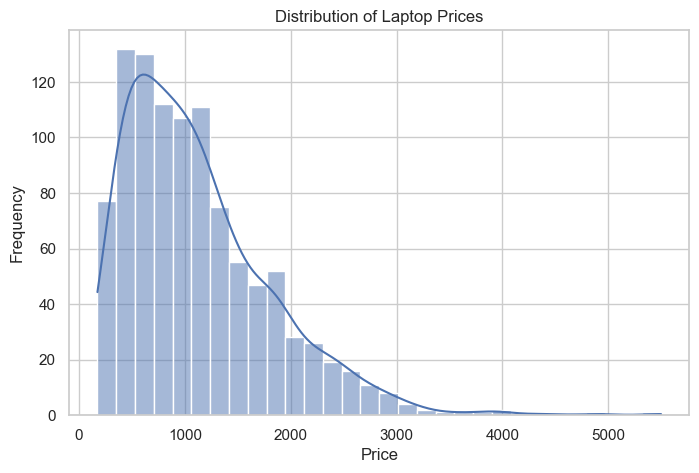

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(y_train, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


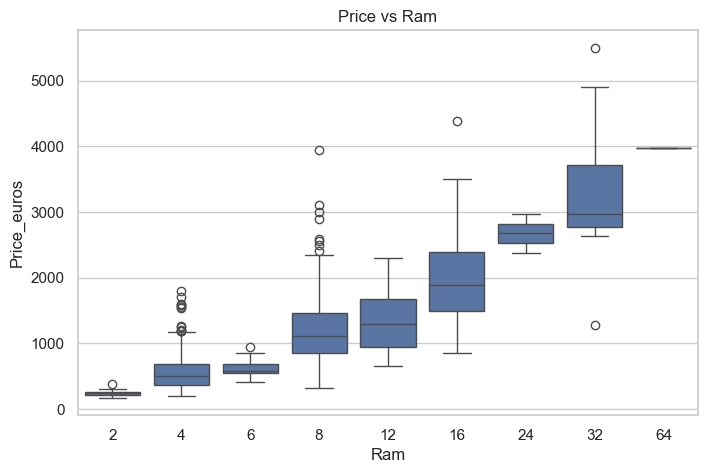

In [53]:
plt.figure(figsize=(8,5))  # Add RAM back in case it's scaled
sns.boxplot(x='Ram', y=y_train, data=X_train.assign(RAM_GB=X_train['Ram']))
plt.title("Price vs Ram")
plt.show()


In [ ]:
### 📝 Final Summary / Conclusion

In this project, I worked on a **Laptop Price Analysis** using a dataset containing specifications of laptops such as RAM, storage, processor, screen type, etc. I began by cleaning the dataset, checking for missing values (none were found), and applied encoding to convert categorical data into a numeric format.

After preprocessing, I split the data into training and test sets and built a **Linear Regression model** to predict laptop prices.

🔍 **Key Insights:**
- Features like **RAM size**, **SSD/HDD storage**, **CPU brand**, and **GPU brand** significantly impacted the price.
- Some binary features like **Touchscreen** and **IPS Panel** added value as well.

📈 **Model Performance:**
- **Mean Squared Error (MSE):** `119978.33`
- **R² Score:** `0.758`

💡 **Final Thoughts:**
This project gave me good hands-on experience in data preprocessing and machine learning. In future versions, I could try more complex models (like Random Forest or XGBoost) to further improve the prediction accuracy.
